# ECON 323 PROJECT

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import folium as fm
import rasterio
import geopandas as gpd
import folium

In [4]:



place_name = "Yokohama, Japan"

tags = {'railway': ['station']}


pt_stops = ox.features_from_place(place_name, tags=tags)


G_walk = ox.graph_from_place(place_name, network_type="walk")


edges = ox.graph_to_gdfs(G_walk, nodes=False, edges=True)




In [5]:
pt_stops

geometry   name  \
element id                                                                      
node    172522965                           POINT (139.65416 35.48688)    新子安   
        263267206                           POINT (139.53143 35.35431)     大船   
        263271899                           POINT (139.64512 35.48464)     子安   
        263274493                              POINT (139.64 35.48143)  神奈川新町   
        263274999                            POINT (139.6232 35.46621)     横浜   
...                                                                ...    ...   
        11329681981                         POINT (139.61742 35.50723)    新横浜   
        12209234608                         POINT (139.49383 35.53209)    長津田   
        12209234609                         POINT (139.49393 35.53191)    長津田   
way     183535997    POLYGON ((139.5183 35.4057, 139.51828 35.40568...    踊場駅   
        267917213    POLYGON ((139.49971 35.41434, 139.49975 35.414...    立場駅   

                                name:en name:ja name:ja_kana  \
element id                                                     
node    172522965           Shin-Koyasu     新子安        しんこやす   
        263267206                 Ōfuna     NaN          NaN   
        263271899                Koyasu      子安          こやす   
        263274493    Kanagawa-shimmachi   神奈川新町     かながわしんまち   
        263274999              Yokohama      横浜          NaN   
...                                 ...     ...          ...   
        11329681981       Shin-Yokohama     新横浜       しんよこはま   
        12209234608           Nagatsuta     長津田          NaN   
        12209234609           Nagatsuta     長津田          NaN   
way     183535997                   NaN     NaN          NaN   
        267917213                   NaN     NaN          NaN   

                             name:ja_rm  name:ko    name:ru  \
element id                                                    
node    172522965           Shin-Koyasu     신코야스  Син-Коясу   
        263267206                   NaN      NaN      Офуна   
        263271899                Koyasu      고야스        NaN   
        263274493    Kanagawa-shimmachi  가나가와신마치        NaN   
        263274999                   NaN     요코하마        NaN   
...                                 ...      ...        ...   
        11329681981       Shin-Yokohama      NaN        NaN   
        12209234608                 NaN     나가쓰다   Нагацута   
        12209234609                 NaN     나가쓰다   Нагацута   
way     183535997                   NaN      NaN        NaN   
        267917213                   NaN      NaN        NaN   

                                        operator public_transport  ...  \
element id                                                         ...   
node    172522965                        東日本旅客鉄道          station  ...   
        263267206                            NaN          station  ...   
        263271899                         京浜急行電鉄          station  ...   
        263274493    京浜急行電鉄 (Keikyu Corporation)          station  ...   
        263274999                         京浜急行電鉄          station  ...   
...                                          ...              ...  ...   
        11329681981                          NaN          station  ...   
        12209234608                       横浜高速鉄道          station  ...   
        12209234609                       東京急行電鉄          station  ...   
way     183535997                            NaN          station  ...   
        267917213                            NaN          station  ...   

                    baby_feeding operator:type operator:wikidata layer line  \
element id                                                                    
node    172522965            NaN           NaN               NaN   NaN  NaN   
        263267206            NaN           NaN               NaN   NaN  NaN   
        263271899            NaN           NaN               NaN   NaN  NaN 

In [6]:
list(pt_stops.columns.values)

['geometry',
 'name',
 'name:en',
 'name:ja',
 'name:ja_kana',
 'name:ja_rm',
 'name:ko',
 'name:ru',
 'operator',
 'public_transport',
 'railway',
 'wikidata',
 'wikipedia',
 'KSJ2:LIN',
 'KSJ2:STN',
 'name:de',
 'name:fr',
 'name:it',
 'name:ja-Hira',
 'name:ja-Latn',
 'gauge',
 'name:es',
 'operator:en',
 'operator:ja',
 'ref',
 'source',
 'source_ref',
 'note',
 'contact:website',
 'name:ja-Kana',
 'wheelchair',
 'train',
 'name:zh-Hans',
 'wikimedia_commons',
 'light_rail',
 'station',
 'alt_name:ko',
 'network',
 'network:en',
 'network:ja',
 'network:wikidata',
 'subway',
 'KSJ2:RAS',
 'KSJ2:segment',
 'note:ja',
 'platforms',
 'website',
 'alt_name',
 'highspeed',
 'name:uk',
 'toilets:wheelchair',
 'phone',
 'air_conditioning',
 'internet_access',
 'start_date',
 'name:kr',
 'name:zh',
 'wikipedia:en',
 'baby_feeding',
 'operator:type',
 'operator:wikidata',
 'layer',
 'line',
 'fixme',
 'old_name',
 'alt_name:en',
 'building',
 'building:levels']

In [7]:
pt_stops_points = pt_stops[pt_stops.geometry.geom_type == "Point"]

pt_stops_filtered = pt_stops_points[["geometry", "name","name:en","public_transport","operator"]]

pt_stops_filtered = pt_stops_filtered.drop_duplicates(subset = ["name"])

pt_stops_filtered

geometry     name             name:en  \
element id                                                                     
node    172522965    POINT (139.65416 35.48688)      新子安         Shin-Koyasu   
        263267206    POINT (139.53143 35.35431)       大船               Ōfuna   
        263271899    POINT (139.64512 35.48464)       子安              Koyasu   
        263274493       POINT (139.64 35.48143)    神奈川新町  Kanagawa-shimmachi   
        263274999     POINT (139.6232 35.46621)       横浜            Yokohama   
...                                         ...      ...                 ...   
        8026433198   POINT (139.68939 35.49574)      弁天橋         Bentembashi   
        8026435189    POINT (139.6754 35.50098)       国道              Kokudo   
        8317640068   POINT (139.48649 35.55813)    こどもの国        Kodomonokuni   
        10108140342   POINT (139.6361 35.53585)      新綱島     Shin-Tsunashima   
        10312940095   POINT (139.5896 35.48341)  横浜羽沢（貨）                 NaN   

                    public_transport                     operator  
element id                                                         
node    172522965            station                      東日本旅客鉄道  
        263267206            station                          NaN  
        263271899            station                       京浜急行電鉄  
        263274493            station  京浜急行電鉄 (Keikyu Corporation)  
        263274999            station                       京浜急行電鉄  
...                              ...                          ...  
        8026433198           station                      東日本旅客鉄道  
        8026435189           station                      東日本旅客鉄道  
        8317640068           station                         東急電鉄  
        10108140342          station                          NaN  
        10312940095          station                          NaN  

[140 rows x 5 columns]

In [8]:

pt_stops_filtered.to_csv("pt_stops_yokohama.csv", index = False)

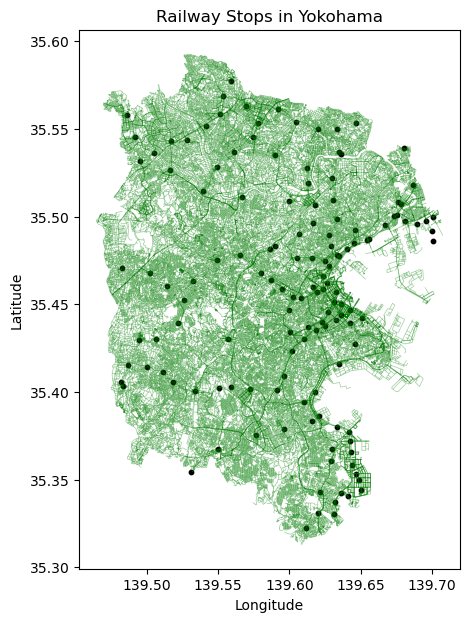

In [48]:

fig, ax = plt.subplots(figsize=(7,7))

edges.plot(ax=ax, color="green", linewidth=0.5, alpha=0.2)

pt_stops_filtered.plot(ax=ax, color="black", markersize=10)


plt.title("Railway Stops in Yokohama")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

fig.savefig("pt_stops_yokohama.png")

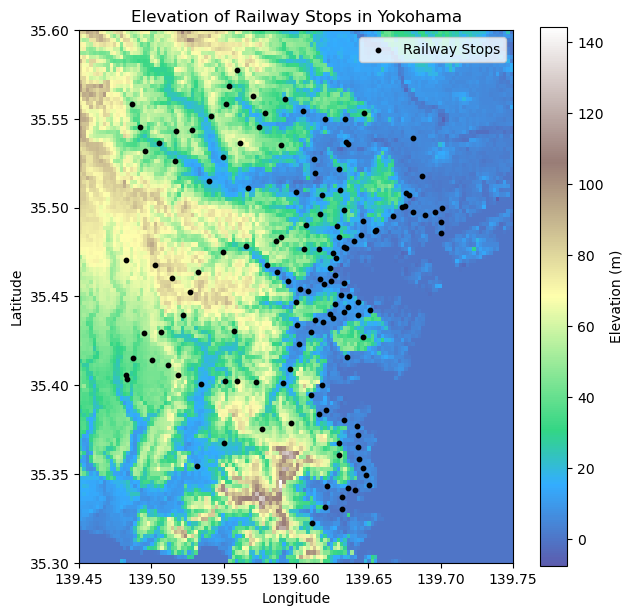

In [50]:
elevation_src = rasterio.open("yokohama_elevation_corrected.tif")
elevation = elevation_src.read(1)
bounds = elevation_src.bounds


fig, ax = plt.subplots(figsize=(7,7))


im = ax.imshow(
    elevation,
    cmap="terrain",
    extent=[bounds.left, bounds.right, bounds.bottom, bounds.top],
    alpha=0.8 
)


pt_stops_filtered.plot(ax=ax, color="black", markersize=10, label="Railway Stops")


ax.set_title("Elevation of Railway Stops in Yokohama")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

plt.colorbar(im, ax=ax, label="Elevation (m)")
fig.savefig("combined_yokohama_elevation_pt.png")


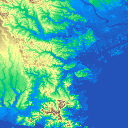

In [64]:
plt.imsave("elevation_overlay.png", elevation, cmap='terrain')


interactive_map = folium.Map(location=[35.5, 139.6], zoom_start=12.5)


folium.raster_layers.ImageOverlay(
    name="Elevation",
    image="elevation_overlay.png",
    bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
    opacity=0.7,
).add_to(interactive_map)


coords = [(point.y, point.x) for point in pt_stops_filtered.geometry]
pt_stops_filtered["elevation"] = [
    x[0] for x in elevation_src.sample([(lon, lat) for lat, lon in coords])
]



for _, row in pt_stops_filtered.iterrows():
    station_name = row.get("name")
    station_name_en = row.get("name:en")
    elevation_value = row["elevation"]

    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=4,
        color="black",
        fill=True,
        fill_opacity=0.9,
        popup=folium.Popup(
            f"<b>{station_name}</b><br><i>{station_name_en}</i><br>Elevation: {elevation_value:.1f} m")
    ).add_to(interactive_map)

folium.LayerControl().add_to(interactive_map)



interactive_map

In [ ]:
#things to do
#culmulative chart with elevation based on how many stations would flood at which level
#If I have a way of getting passenger volume easily, I can create vulnerability score
#Create a sea level rise graph + regression model to predict how many stations would be at risk in the future
#Could emphisize sea level more and if Yokohama is at risk of sinking
